# Imports

In [116]:
import cv2
import pytesseract
import re
import json
import imutils
from matplotlib import pyplot as plt

# Load Image

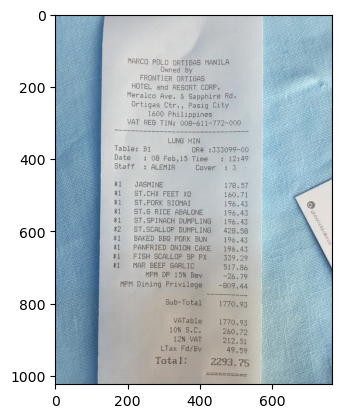

In [117]:
# Load the bill image using OpenCV
bill_image = cv2.imread('bill.jpg')

plt.imshow(bill_image)
plt.show()

In [77]:
bill_image.shape


(1024, 768, 3)

## Preprocessing

In [78]:
size = cv2.resize(bill_image,(1920,1080))
cv2.imwrite("newimage.jpg",bill_image)

True

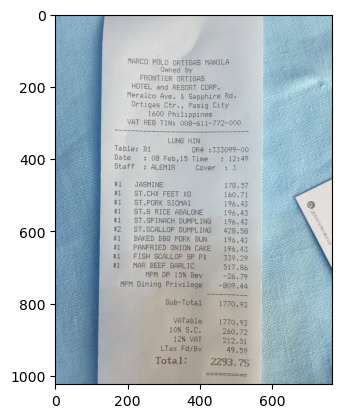

In [79]:
img=cv2.imread("newimage.jpg")
plt.imshow(img)
plt.show()

## Crop image for text extraction 

This method increase accuracy of text extraction from image

In [111]:
from PIL import Image

def crop_vertical(image_path, output_path_top, output_path_middle,output_path_bottom,end_path_crop):
    try:
        # Open the image using Pillow
        img = Image.open(image_path)

        # Get the dimensions of the original image
        width, height = img.size

        # Define the coordinates and dimensions for the top and bottom crop regions
        top_region = (0, 0, width, height *0.5)
        middile_region=(0, height *0.5,width,height*0.75)
        bottom_region = (0, height *0.75, width, height)
        end_region=(0,height*0.8,width,height)
        
        # Crop the top and bottom regions
        top_crop = img.crop(top_region)
        middle_crop=img.crop(middile_region)
        bottom_crop = img.crop(bottom_region)
        end_crop=img.crop(end_region)
                          
        # Save the cropped regions as separate images
        top_crop.save(output_path_top)
        middle_crop.save(output_path_middle)
        bottom_crop.save(output_path_bottom)
        end_crop.save(end_path_crop)
        # Display the cropped regions (optional)
        top_crop.show()
        middle_crop.show()
        bottom_crop.show()
        end_crop.show()
    except Exception as e:
        print(f"Error: {e}")

# Example usage
input_image_path = "bill.jpg"
output_path_top = "top_crop.png"  # Specify the path to save the top cropped region
output_path_middle="middle_crop.png"
output_path_bottom = "bottom_crop.png"  # Specify the path to save the bottom cropped region
end_path_crop="end_crop.png"
crop_vertical(input_image_path, output_path_top,output_path_middle, output_path_bottom,end_path_crop)


img1=cv2.imread("top_crop.png")
img2=cv2.imread("middle_crop.png")
img3=cv2.imread("bottom_crop.png")
size = cv2.resize(img3,(1920,1080))
cv2.imwrite("img4.jpg",img3)
img4=cv2.imread("img4.jpg")
img5=cv2.imread("end_crop.png")                         

## Extracting Text

In [112]:
# Extract text line-wise using Tesseract
extracted_text1 = pytesseract.image_to_string(img1, lang='eng')
extracted_text1.splitlines()
# Extract text line-wise using Tesseract
extracted_text2 = pytesseract.image_to_string(img2, lang='eng')
extracted_text2.splitlines()
# Extract text line-wise using Tesseract
extracted_text3 = pytesseract.image_to_string(img4, lang='eng')
extracted_text3.splitlines()
extracted_text4 = pytesseract.image_to_string(img5, lang='eng')
extracted_text4.splitlines()

merged_text = extracted_text1 + extracted_text2 + extracted_text3+extracted_text4
merged_text.splitlines()

['MARCO POLO ORTIGAS MANILA',
 'Owned by',
 'FRONTIER ORTIGAS',
 'HOTEL and RESORT CORP.',
 'Meralco Ave. & Sapphire Rd.',
 'Ortigas Ctr., Pasig City',
 '1600 Philippines',
 'VAT REG TIN: 008-611-772-000',
 'LUNG HIN',
 'Table: Bi OR# :333099-00',
 'Date +: 08 Feb,i5 Time +: 12:49',
 'Staff : ALEMIR Cover : 3',
 '',
 '10 JASMINE 178.57',
 '41 ST.CHX FEET xo 160.71',
 '',
 'Xl ST.PORK SIOMAL 196.43',
 '41 ST.6 RICE ABALONE 196.43',
 '1 ST.SPINACH DUMPLING 194.45',
 '42 ST.SCALLOP DUMPLING 428.58',
 '1 BAKED BBQ PORK BUN 194.43',
 '1 PANFRIED ONION CAKE 194.43',
 'x1 FISH SCALLOP SP FX 339.29',
 'ki MAR BEEF GARLIC 517.86',
 '',
 'MPM DP 15% Bey = ~24,79',
 '',
 'MPM Dining Privilege 809,44',
 '',
 'Sub-Total 1770.93',
 '',
 'VATable 1770.93',
 '',
 '10% S.C. 260.72',
 '124 VAT 212.51',
 'LTax Fd/By 49.59',
 '',
 'Total:',
 '',
 'VATable 1770.93',
 '',
 '10% S.C. 260.72',
 '126 VAT 212.51',
 'LTax Fd/By 49,59',
 '',
 'Total: 2293.75',
 '']

## Identifying the index of the line for indication keywords

In [118]:

# extract the start line for consumped items
def Get_index(data_list):
    start,end=[],[]
    table = []
    date = []
    staff=[]
    subtotal=[]
    MPMDP=[]
    VATable=[]
    SC=[]
    VAT=[]
    LTax=[]
    Total=[]
    for ind, line in enumerate(data_list):
        if 'staff' in line.lower() and 'cover' in line.lower():  # identifying start line
            start.append(ind)
        if 'mpm dp' in line.lower(): # identifying end line
            end.append(ind)
        if 'date' in line.lower(): # identifying end line
            date.append(ind)
        if 'table' in line.lower(): # identifying end line
            table.append(ind)
        if 'staff' in line.lower(): # identifying end line
            staff.append(ind)
        if 'sub-total' in line.lower(): # identifying end line
            subtotal.append(ind)
        if 'mpm dp' in line.lower(): # identifying end line
            MPMDP.append(ind)
        if 'vatable' in line.lower(): # identifying end line
            VATable.append(ind)
        if 's.c.' in line.lower(): # identifying end line
            SC.append(ind)
        if 'vat' in line.lower(): # identifying end line
            VAT.append(ind)
        if 'ltax' in line.lower(): # identifying end line
            LTax.append(ind)
        if 'total' in line.lower(): # identifying end line
            Total.append(ind)
            
            
    return start,end,date,table,staff,subtotal,MPMDP,VATable,SC,VAT,LTax,Total





## Extract the Data and visualization 

In [119]:
def main():
    lines=[]
    for line in merged_text.splitlines():
        lines.append(re.sub('/s+',' ',line.strip()))

    start,end,date,table,staff,subtotal,MPMDP,VATable,SC,VAT,LTax,Total = Get_index(lines)
    
    if start == [] and end == []:
        print('keyword not found')
    
#     print(start,end)
    
    start,end,date,table,staff,subtotal,MPMDP,VATable,SC,VAT,LTax,Total=min(start),max(end),min(date),min(table),min(staff),min(subtotal),min(MPMDP),min(VATable),min(SC),max(VAT),min(LTax),max(Total)
    
    
    result = {
#         'date' : [],
#         'staff':[],
#         'table' : [],
        'items' : [],
        'price' : [],
        
        
    }
    
    for data in lines[start:end]:
        if 'staff' not in data.lower():  # remove keyword line
            if ' '  in data.lower(): 
                result['price'].append( re.sub(r',', '.',data.split()[-1]))
#                 result['price'].append(data.split()[-1])
                result['items'].append(' '.join(data.split()[1:-1]))

#     result['table'].append((lines[table].split()[1]))
#     result['date'].append(' '.join(lines[date].split()[2:-3]))
#     result['staff'].append ((lines[staff].split()[2]))   
    
    
    
    
        # Create the dictionary with the specified structure
    data = {
        "table":(lines[table].split()[1]),
        "date":' '.join(lines[date].split()[2:-3]),
        "staff":(lines[staff].split()[2]),
        "consumed_item": [
            {"item": item, "price": price}
            for item, price in zip(result['items'],result['price'])
        ],
        "MPM DP":(re.sub(r',', '.',lines[MPMDP].split()[-1])),
        "SubTotal":(lines[subtotal].split()[-1]),
        "VATable":(lines[VATable].split()[-1]),
        "SC":(lines[SC].split()[-1]),
        "VAT":(lines[VAT].split()[-1]),
        "LTax":(lines[LTax].split()[-1]),
        "Total":(lines[Total].split()[-1])
       
        
    }

    # Convert the dictionary to a JSON string with pretty printing
    json_string = json.dumps(data, indent=2)

    # Print the JSON string
    print(json_string)
    
    return result


# Result

In [120]:
result=main()

{
  "table": "Bi",
  "date": "08 Feb,i5",
  "staff": "ALEMIR",
  "consumed_item": [
    {
      "item": "JASMINE",
      "price": "178.57"
    },
    {
      "item": "ST.CHX FEET xo",
      "price": "160.71"
    },
    {
      "item": "ST.PORK SIOMAL",
      "price": "196.43"
    },
    {
      "item": "ST.6 RICE ABALONE",
      "price": "196.43"
    },
    {
      "item": "ST.SPINACH DUMPLING",
      "price": "194.45"
    },
    {
      "item": "ST.SCALLOP DUMPLING",
      "price": "428.58"
    },
    {
      "item": "BAKED BBQ PORK BUN",
      "price": "194.43"
    },
    {
      "item": "PANFRIED ONION CAKE",
      "price": "194.43"
    },
    {
      "item": "FISH SCALLOP SP FX",
      "price": "339.29"
    },
    {
      "item": "MAR BEEF GARLIC",
      "price": "517.86"
    }
  ],
  "MPM DP": "~24.79",
  "SubTotal": "1770.93",
  "VATable": "1770.93",
  "SC": "260.72",
  "VAT": "212.51",
  "LTax": "49.59",
  "Total": "2293.75"
}
